## Observations and Insights 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Review dfs
#mouse_metadata_df.shape  # Returns 249 rows, 5 columns
study_results_df.shape  # Returns 1893 rows, 4 columns
# Use Mouse ID as the index to join these 2 tables

# Combine the data into a SINGLE DATASET using outer join on Mouse ID
mouse_study_combined_df = pd.merge(study_results_df, mouse_metadata_df, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_study_combined_df
#mouse_study_combined_df.shape  # Returns 1893 rows, 8 columns

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.

num_mouse_df = mouse_metadata_df['Mouse ID'].count()
num_mouse_df

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ID_df = mouse_study_combined_df.loc[mouse_study_combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

duplicate_mouse_ID_df  # Returns g989 as duplicate Mouse ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = pd.DataFrame(duplicate_mouse_ID_df)
duplicate_data  ## Returns g989 as duplicate Mouse ID in a df.  This mouse ID will be removed due to bad clinical data.

,0
0,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.  Expect to have total count of 248 Mouse IDs after g989 is removed in the clean df.

clean_df = mouse_study_combined_df[mouse_study_combined_df['Mouse ID'].isin(duplicate_mouse_ID_df)==False]
clean_df.head()
clean_df.shape

(1880, 8)

In [7]:
# Checking the number of mice in the clean DataFrame.

num_clean_df = clean_df['Mouse ID'].value_counts()  # Returns a series containing counts of unique values
#num_clean_df  # Name: Mouse ID, Length: 248, dtype: int64

num_mouse_clean_df = len(num_clean_df)  # len() computes the length of each element in the Series/Index.
num_mouse_clean_df

248

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Create a df from clean_df using Groupby on column Drug Regimen. 

# For each Drug Regimen (.groupby('Drug Regimen'), what is the MEAN of Tumor Volume?

tumor_volume_regimen_mean_df = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_volume_regimen_mean_df
#tumor_volume_regimen_mean_df.shape  # There are 10 regimen and it will be the same for all stats to follow.

# For each Drug Regimen (.groupby('Drug Regimen'), what is the MEDIAN of Tumor Volume?

tumor_volume_regimen_median_df = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_volume_regimen_median_df

# For each Drug Regimen (.groupby('Drug Regimen'), what is the VARIANCE of Tumor Volume?

tumor_volume_regimen_var_df = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_volume_regimen_var_df

# For each Drug Regimen (.groupby('Drug Regimen'), what is the STANDARD DEVIATION of Tumor Volume?

tumor_volume_regimen_std_df = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_volume_regimen_std_df

# For each Drug Regimen (.groupby('Drug Regimen'), what is the SEM (unbiased standard error of the mean over requested axis) of Tumor Volume?

tumor_volume_regimen_sem_df = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
tumor_volume_regimen_sem_df

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stat_tumor_df = pd.DataFrame(
    {'Mean': tumor_volume_regimen_mean_df,
     'Median': tumor_volume_regimen_median_df,
     'Variance': tumor_volume_regimen_var_df,
     'Standard Deviation': tumor_volume_regimen_std_df,
     'SEM': tumor_volume_regimen_sem_df,         
    }
)

summary_stat_tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total of Mice per Regimen')

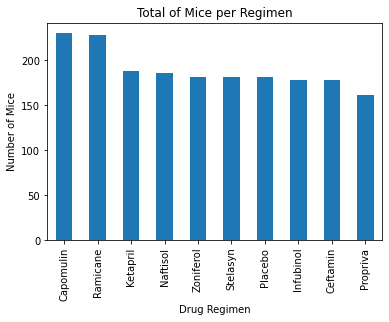

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Calculate the number of mouse per drug tested using groupby in the mouse_study_combined_df .  This is preparting the Y-AXIS to be used later on in generating Bar plot.
# For each drug regimen, what is the count of mice?

# Use Pandas to create a bar graph.

pandas_bar_graph = mouse_study_combined_df['Drug Regimen'].value_counts().plot.bar()
pandas_bar_graph.set_xlabel('Drug Regimen')
pandas_bar_graph.set_ylabel('Number of Mice')
pandas_bar_graph.set_title('Total of Mice per Regimen')

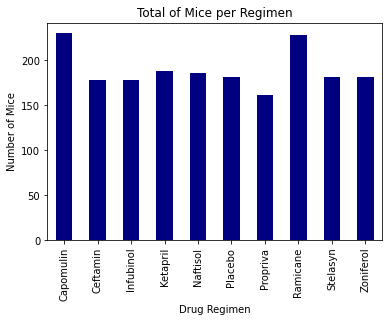

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Use Pyplot to create a bar graph.

# Create a df with groupby on Drug Regimen in order to count the number of mice per drug regimen.

num_mouse_per_drug_df = mouse_study_combined_df.groupby(['Drug Regimen']).count()['Mouse ID']

plot_bar_graph = num_mouse_per_drug_df.plot.bar(color='navy')
#plot_bar_graph = mouse_study_combined_df.plot.bar(color='navy')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Total of Mice per Regimen')

plt.show()

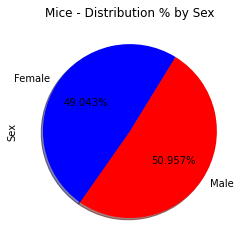

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create the framework for data to be used in a pie plot. It will have the number of mice per sex.

mouse_sex_data_df = clean_df['Sex'].value_counts()
mouse_sex_data_df
colors = ['red', 'blue']


# Create pie plot using Pandas using data from clean df and doing a count on Sex column

mouse_gender_pie_plot = mouse_sex_data_df.plot.pie(figsize=(4, 4), colors = colors, shadow=10, autopct='%.3f%%', startangle=235, title='Mice - Distribution % by Sex')  

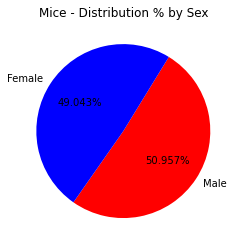

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#get counts of male and female
mouse_sex_data_df = clean_df['Sex'].value_counts()
mouse_sex_data_df
colors = ['red', 'blue']


# Use plt to create the pid plot
plt.pie(mouse_sex_data_df, labels=mouse_sex_data_df.index.values, colors = colors, autopct='%.3f%%', startangle=235)
plt.title('Mice - Distribution % by Sex')

#show pie
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [34]:
# Start by getting the last (greatest) timepoint for each mouse

# Use clean_df and use column Timepoint

#Highest_timepoint_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Highest_Timepoint'})

highest_timepoint_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values(ascending=False)).rename(columns={'Timepoint': 'Highest_Timepoint'})  # Define a dictionary and assign key Timepoint to value Highest_Timepoint in the new df and do sort by descending

highest_timepoint_df.head()

highest_timepoint_df.shape   # Returns 248 rows and 2 columns

(248, 1)

In [43]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Merge highest_timepoint_df with clean.df

volume_df = pd.merge(clean_df, highest_timepoint_df, how='outer', on="Mouse ID")
volume_df.head()
#volume_df.shape   # Returns 1880 rows across 9 columns as expected

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Highest_Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [46]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']   # Use a list for the 4 drugs mentionned in the step above  

# Create empty list to fill with tumor vol data (for plotting)

data_tumor_volume = []   # Initialize a list 


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Definition of IQR:  The IQR or Inter Quartile Range is a statistical measure used to measure the variability in a given data. In naive terms, it tells us inside what range the bulk of our data lies. It can be calculated by taking the difference between the third quartile and the first quartile within a dataset.
# IQR = Q3 - Q1

for treatment in treatments:
    # Need to pull in the mouse data that used one of 4 drugs from above. Use .loc on Drug Regimen
    # Need a new df to store the data for the 4 drug regimens
    # Need to append the data determined in the FOR Loop to data_tumor_volume
    
    findings = volume_df['Tumor Volume (mm3)']
    data_tumor_volume.append(findings)
  
    
    
    
    
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

AttributeError: 'DataFrame' object has no attribute 'arange'

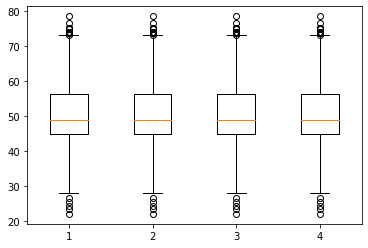

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(data_tumor_volume,)

plt.xticks(volume_df.arange(4), ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

plt.plot


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
